In [4]:
import torch
from d2l import torch as d2l
import sys
sys.path.append('../../CommonFunctions/tools/')
import common_tools
import sequence_tools

## 2、查询、键、值
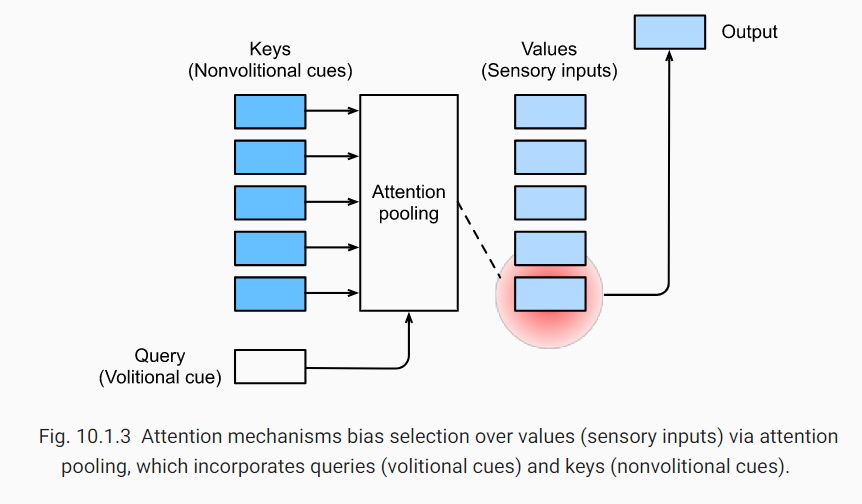

## 3、Visualization of Attention
为了可视化注意力权重，我们定义了show_heatmaps 函数。它的输入matrices具有形状（显示的行数、显示的列数、查询数、键数）。

In [7]:
#@save
def show_heatmaps(matrices, xlabel, ylabel, titles=None, figsize=(2.5, 2.5), cmap='Reds'):
    """Show heatmaps of matrices."""
    common_tools.use_svg_display()
    num_rows, num_cols = matrices.shape[0], matrices.shape[1]
    fig, axes = common_tools.plt.subplots(num_rows, 
                                          num_cols, 
                                          figsize=figsize, 
                                          sharex=True, 
                                          sharey=True, 
                                          squeeze=False)
    for i, (row_axes, row_matrices) in enumerate(zip(axes, matrices)):
        for j, (ax, matrix) in enumerate(zip(row_axes, row_matrices)):
            pcm = ax.imshow(matrix.detach().numpy(), cmap=cmap)
            if i == num_rows - 1:
                ax.set_xlabel(xlabel)
            if j == 0:
                ax.set_ylabel(ylabel)
            if titles:
                ax.set_title(titles[j])
    fig.colorbar(pcm, ax=axes, shrink=0.6)

考虑一个简单的情况，即仅当查询和键相同时注意力权重才为 1；否则为零。

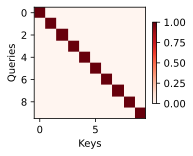

In [8]:
attention_weights = torch.eye(10).reshape((1, 1, 10, 10))
show_heatmaps(attention_weights, xlabel='Keys', ylabel='Queries')